In [1]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC

In [3]:
def load_dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None)
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X.values, y, cat_ix, num_ix

In [4]:
# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(f2_measure)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores
# define models to test
def get_models():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression(solver='liblinear'))
    names.append('LR')
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # NB
    models.append(GaussianNB())
    names.append('NB')
    # GPC
    models.append(GaussianProcessClassifier())
    names.append('GPC')
    # SVM
    models.append(SVC(gamma='scale'))
    names.append('SVM')
    return models, names

>LR 0.497 (0.072)
>LDA 0.519 (0.072)
>NB 0.639 (0.049)
>GPC 0.219 (0.061)
>SVM 0.436 (0.077)


C:\Users\Ayush.AYUSHKOTARYA\AppData\Local\Temp\ipykernel_7044\380732516.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names, showmeans=True)


<function matplotlib.pyplot.show(close=None, block=None)>

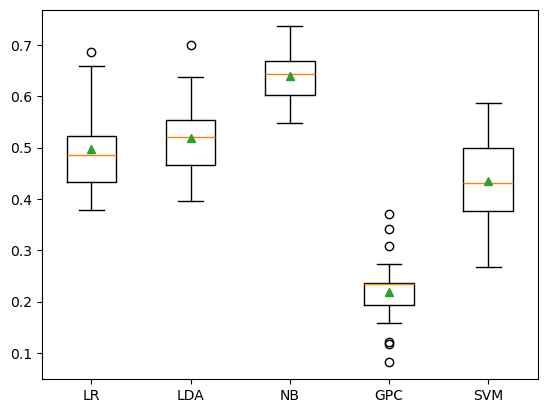

In [5]:
# define the location of the dataset
full_path = './german.csv'
# load the dataset
X, y, cat_ix, num_ix = load_dataset(full_path)
# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
    # one hot encode categorical, normalize numerical
    ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
    # wrap the model in a pipeline
    pipeline = Pipeline(steps=[('t',ct),('m',models[i])])
    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show

>TL 0.669 (0.057)
>ENN 0.706 (0.048)
>RENN 0.714 (0.041)
>OSS 0.669 (0.056)
>NCR 0.683 (0.053)


C:\Users\Ayush.AYUSHKOTARYA\AppData\Local\Temp\ipykernel_3720\3272877724.py:88: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names, showmeans=True)


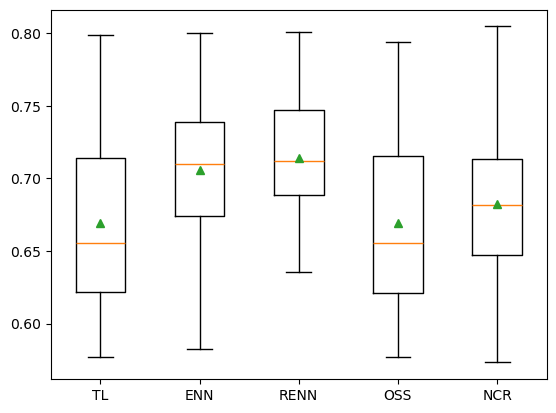

In [1]:
# evaluate undersampling with logistic regression on the imbalanced german credit dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import OneSidedSelection

# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None)
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X.values, y, cat_ix, num_ix
# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(f2_measure)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores
# define undersampling models to test
def get_models():
    models, names = list(), list()
    # TL
    models.append(TomekLinks())
    names.append('TL')
    # ENN
    models.append(EditedNearestNeighbours())
    names.append('ENN')
    # RENN
    models.append(RepeatedEditedNearestNeighbours())
    names.append('RENN')
    # OSS
    models.append(OneSidedSelection())
    names.append('OSS')
    # NCR
    models.append(NeighbourhoodCleaningRule())
    names.append('NCR')
    return models, names

# define the location of the dataset
full_path = './german.csv'
# load the dataset
X, y, cat_ix, num_ix = load_dataset(full_path)
# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
    # define model to evaluate
    model = LogisticRegression(solver='liblinear', class_weight='balanced')
    # one hot encode categorical, normalize numerical
    ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
    # scale, then undersample, then fit model
    pipeline = Pipeline(steps=[('t',ct), ('s', models[i]), ('m',model)])
    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [2]:
# fit a model and make predictions for the german credit dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None)
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X.values, y, cat_ix, num_ix
# define the location of the dataset
full_path = 'german.csv'
# load the dataset
X, y, cat_ix, num_ix = load_dataset(full_path)
# define model to evaluate
model = LogisticRegression(solver='liblinear', class_weight='balanced')
# one hot encode categorical, normalize numerical
ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
# scale, then undersample, then fit model
pipeline = Pipeline(steps=[('t',ct), ('s', RepeatedEditedNearestNeighbours()), ('m',model)])
# fit the model
pipeline.fit(X, y)
# evaluate on some good customers cases (known class 0)
print('Good Customers:')
data = [['A11', 6, 'A34', 'A43', 1169, 'A65', 'A75', 4, 'A93', 'A101', 4, 'A121', 67,
'A143', 'A152', 2, 'A173', 1, 'A192', 'A201'],
['A14', 12, 'A34', 'A46', 2096, 'A61', 'A74', 2, 'A93', 'A101', 3, 'A121', 49, 'A143',
'A152', 1, 'A172', 2, 'A191', 'A201'],
['A11', 42, 'A32', 'A42', 7882, 'A61', 'A74', 2, 'A93', 'A103', 4, 'A122', 45, 'A143',
'A153', 1, 'A173', 2, 'A191', 'A201']]
for row in data:
    # make prediction
    yhat = pipeline.predict([row])
    # get the label
    label = yhat[0]
    # summarize
    print('>Predicted=%d (expected 0)' % (label))
# evaluate on some bad customers (known class 1)
print('Bad Customers:')
data = [['A13', 18, 'A32', 'A43', 2100, 'A61', 'A73', 4, 'A93', 'A102', 2, 'A121', 37,
'A142', 'A152', 1, 'A173', 1, 'A191', 'A201'],
['A11', 24, 'A33', 'A40', 4870, 'A61', 'A73', 3, 'A93', 'A101', 4, 'A124', 53, 'A143',
'A153', 2, 'A173', 2, 'A191', 'A201'],
['A11', 24, 'A32', 'A43', 1282, 'A62', 'A73', 4, 'A92', 'A101', 2, 'A123', 32, 'A143',
'A152', 1, 'A172', 1, 'A191', 'A201']]
for row in data:
    # make prediction
    yhat = pipeline.predict([row])
    # get the label
    label = yhat[0]
    # summarize
    print('>Predicted=%d (expected 1)' % (label))

Good Customers:
>Predicted=0 (expected 0)
>Predicted=0 (expected 0)
>Predicted=1 (expected 0)
Bad Customers:
>Predicted=1 (expected 1)
>Predicted=1 (expected 1)
>Predicted=1 (expected 1)
